In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_excel('power.xlsx')

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,21240.0,3.290522,1.625414,0.302,1.866,3.184,4.246,9.994
Global_reactive_power,21240.0,0.259400,0.144701,0.046,0.148,0.236,0.342,1.198
Voltage,21240.0,237.324997,3.416039,225.120,235.180,237.500,239.570,249.150
Global_intensity,21240.0,14.020800,6.969000,1.200,8.000,13.600,18.000,43.400
Kitchen_consumption,21240.0,13.424529,16.472617,1.000,1.000,2.000,36.000,40.000
Laundry_consumption,21240.0,9.266667,13.661116,1.000,1.000,2.000,15.000,60.000
Other_appliances_consumption,21240.0,16.654379,4.156162,1.000,17.000,17.000,18.000,30.000


In [5]:
data.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

In [6]:
# Outliers in data

In [7]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Kitchen_consumption', 'Laundry_consumption',
       'Other_appliances_consumption'],
      dtype='object')

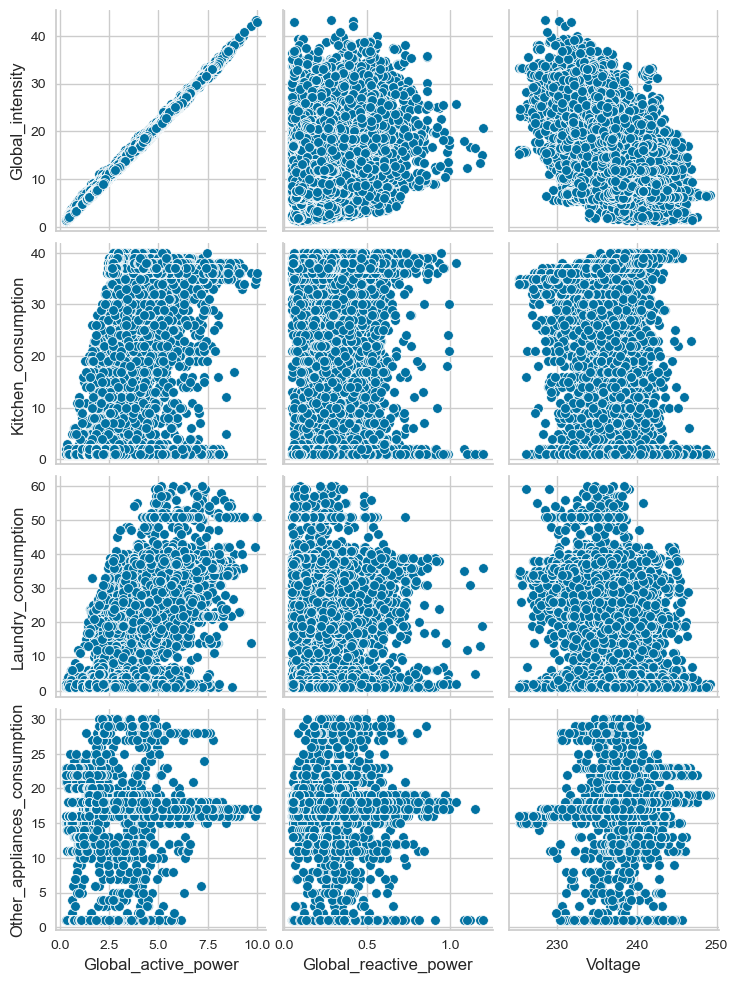

In [8]:
sns.pairplot(x_vars=['Global_active_power', 'Global_reactive_power', 'Voltage'],y_vars=[ 'Global_intensity', 'Kitchen_consumption', 'Laundry_consumption',
       'Other_appliances_consumption'], data=data)

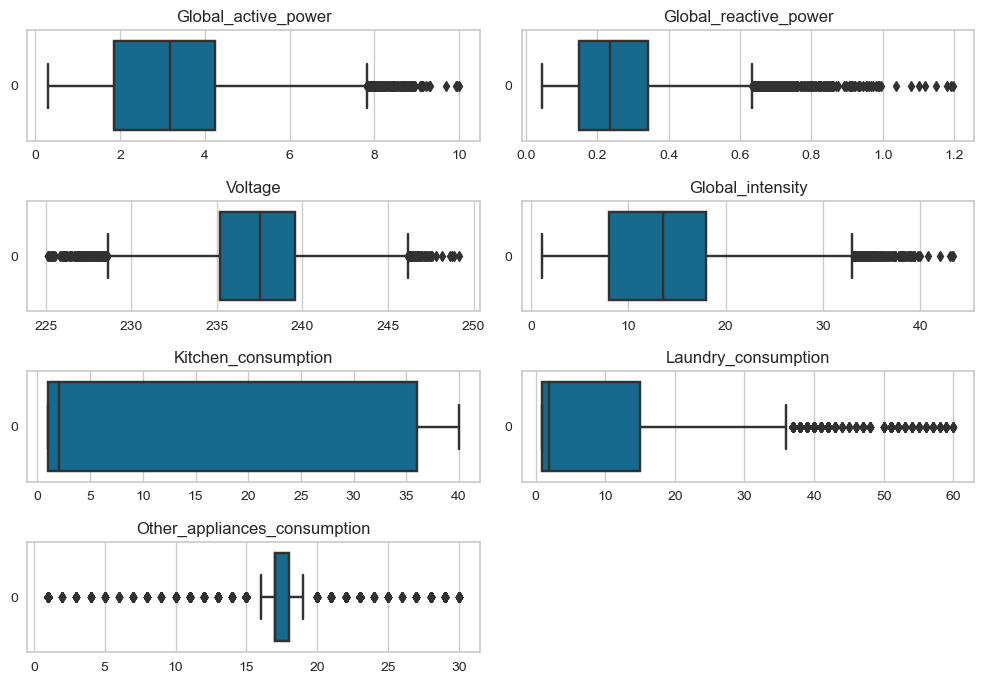

In [9]:
plt.figure(figsize=(10,7))
t= 1
for i in data.columns:
    plt.subplot(4,2,t)
    sns.boxplot(data[i], orient = 'h')
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

### Lets first reduce the dimension of the data for better visualization and clustering

In [10]:
sc = StandardScaler()
data_s = pd.DataFrame(sc.fit_transform(data), columns = data.columns)

In [11]:
pca = PCA(n_components=7)

In [12]:
pd.DataFrame(pca.fit_transform(data_s), columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-1.067477,-0.532983,-0.407351,-0.111041,0.442326,0.076597,0.046378
1,0.922166,-1.236260,-0.174417,1.332453,0.397879,-0.543565,-0.022590
2,0.295110,-0.864841,-0.027505,1.107541,0.386370,-0.337571,0.036333
3,0.866390,-1.313918,-0.246008,1.296131,0.418119,-0.515567,-0.033380
4,0.284213,-0.939421,-0.097359,1.096489,0.355774,-0.381237,0.020434
...,...,...,...,...,...,...,...
21235,-0.946356,0.038911,0.277882,0.237341,-0.079002,0.470977,-0.012247
21236,-0.995878,-0.071815,0.466236,0.136076,0.078982,0.463673,-0.011619
21237,-0.902515,0.075620,0.266611,0.162855,0.206436,0.454049,-0.011338
21238,-0.727290,-0.150238,0.378824,-0.000697,0.445753,0.510563,-0.006135


In [13]:
pca.fit(data_s)

PCA(n_components=7)

In [14]:
pca.explained_variance_

array([3.1531922 , 1.14222068, 0.97792442, 0.90655462, 0.65237637,
       0.16738138, 0.00067991])

In [15]:
pca.explained_variance_ratio_

array([0.45043482, 0.1631667 , 0.13969691, 0.12950171, 0.09319224,
       0.0239105 , 0.00009713])

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45043482, 0.61360152, 0.75329843, 0.88280014, 0.97599237,
       0.99990287, 1.        ])

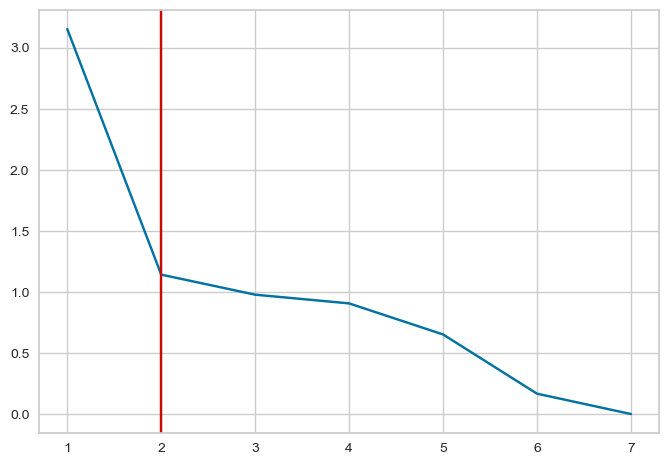

In [17]:
# scree plot
plt.plot(pca.explained_variance_)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=[1,2,3,4,5,6,7])
plt.axvline(x=1, color='r', ls = '-')
plt.show()

In [18]:
pca.explained_variance_[pca.explained_variance_>=1]

array([3.1531922 , 1.14222068])

In [19]:
pca = PCA(n_components=2)

In [20]:
data_pca = pd.DataFrame(pca.fit_transform(data_s), columns=['PCA1', 'PCA2'])

In [21]:
data_pca

,PCA1,PCA2
0,-1.067477,-0.532983
1,0.922166,-1.236260
2,0.295110,-0.864841
3,0.866390,-1.313918
4,0.284213,-0.939421
...,...,...
21235,-0.946356,0.038911
21236,-0.995878,-0.071815
21237,-0.902515,0.075620
21238,-0.727290,-0.150238


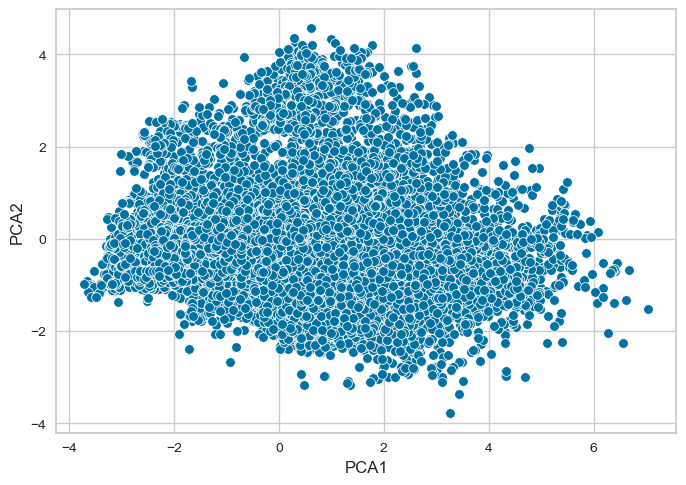

In [22]:
sns.scatterplot(x=data_pca['PCA1'], y=data_pca['PCA2'])
plt.show()

### Lets try K-Means clustering of the PCA data

In [23]:
# Elbow plot to identify the number of clusters

In [24]:
K_elbow = KElbowVisualizer(KMeans(),k=10)

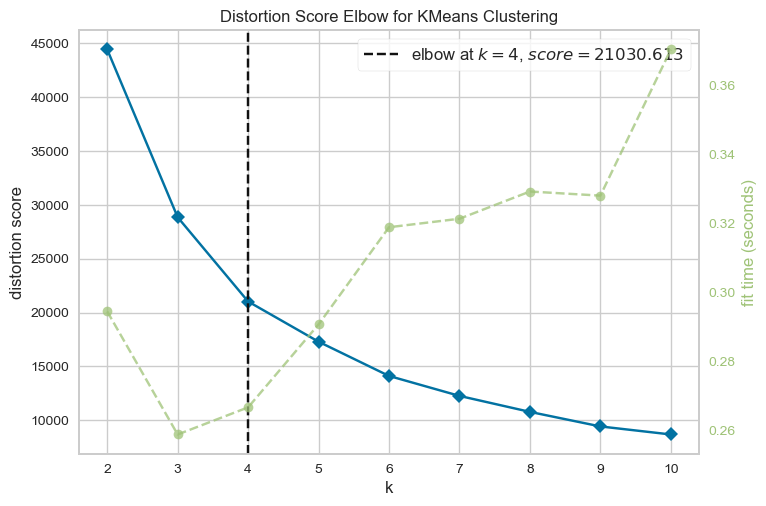

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
K_elbow.fit(data_pca)
K_elbow.show()

In [26]:
data_pca

,PCA1,PCA2
0,-1.067477,-0.532983
1,0.922166,-1.236260
2,0.295110,-0.864841
3,0.866390,-1.313918
4,0.284213,-0.939421
...,...,...
21235,-0.946356,0.038911
21236,-0.995878,-0.071815
21237,-0.902515,0.075620
21238,-0.727290,-0.150238


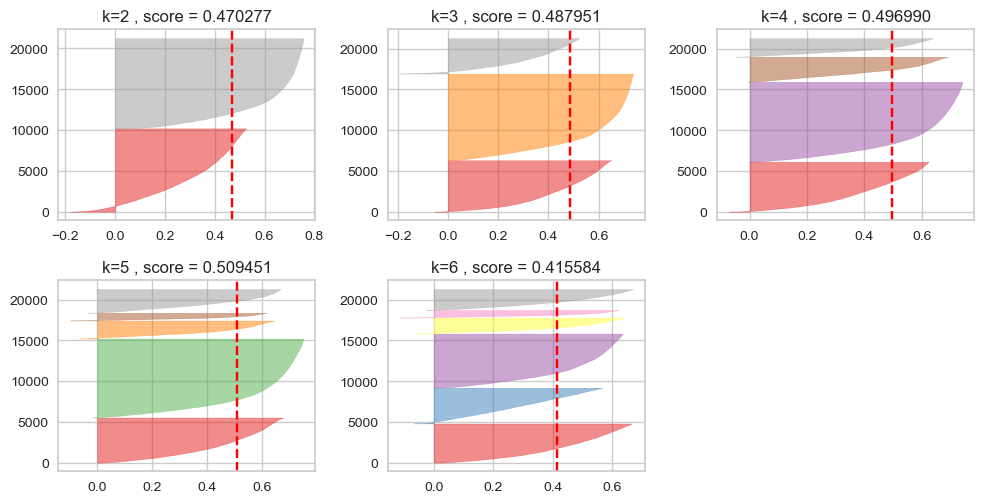

In [27]:
# silhoutte visualiser
plt.figure(figsize=(10,10))
c=1
for i in range(2,7):
    plt.subplot(4,3,c)
    model = KMeans(n_clusters=i )
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    c+=1
    plt.title('k=%d , score = %2f' %(i,sil_viz.silhouette_score_))
    
plt.tight_layout()
plt.show()

# thickness of strip shows the density of the data.

In [28]:
final_model = KMeans(n_clusters=4)

In [29]:
data_pca['Label'] = final_model.fit_predict(data_pca)

In [30]:
centroids = final_model.cluster_centers_

In [31]:
centroids

array([[-1.57457549, -0.11278118],
       [ 3.36039008, -0.63357147],
       [ 0.91161239,  1.08035963],
       [ 0.71725727, -1.3330952 ]])

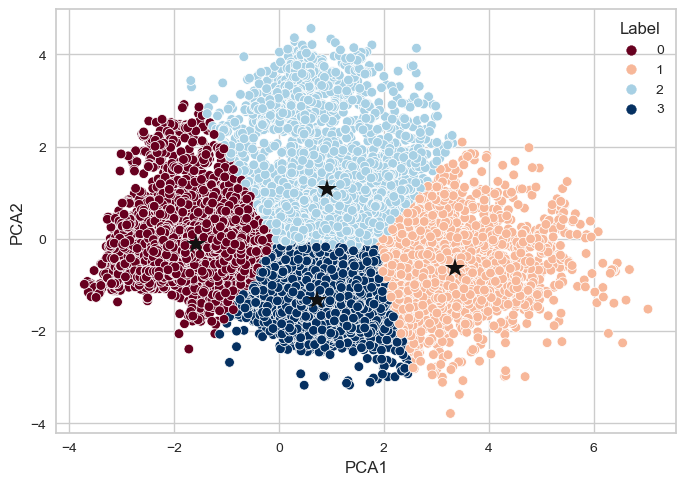

In [32]:
sns.scatterplot(x = data_pca['PCA1'] , y=data_pca['PCA2'],hue = data_pca['Label'] , palette = 'RdBu' )

for i in range (4):
    plt.plot(centroids[i][0] ,centroids[i][1], marker='*' , ms=15, color ='k')  # shows the cetroids for the clusters

plt.show()

In [33]:
data_s = pd.DataFrame(sc.fit_transform(data), columns = data.columns)

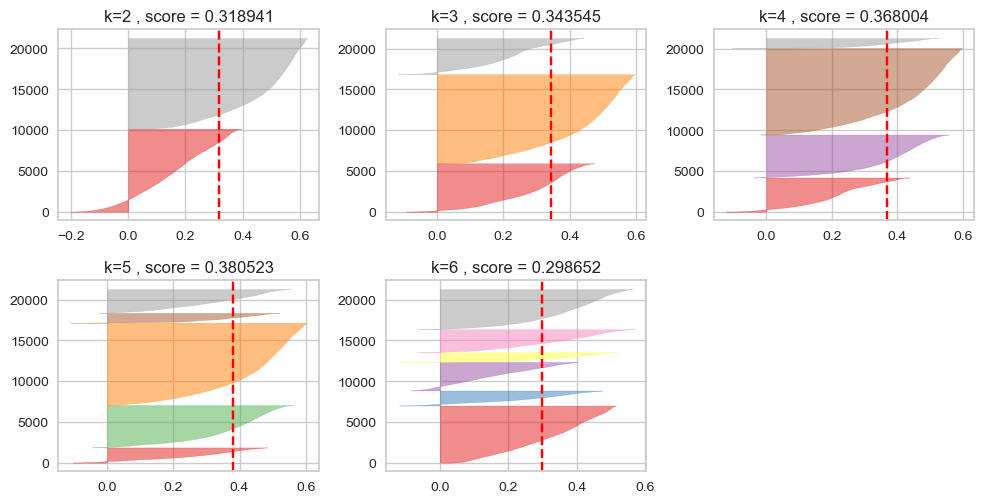

In [34]:
# silhoutte visualiser
plt.figure(figsize=(10,10))
c=1
for i in range(2,7):
    plt.subplot(4,3,c)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_s)
    c+=1
    plt.title('k=%d , score = %2f' %(i,sil_viz.silhouette_score_))
    
plt.tight_layout()
plt.show()

# thickness of strip shows the density of the data.

### Inferences

In [35]:
data['Label'] = final_model.fit_predict(data_pca)

In [36]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Label
0,2.242,0.162,237.33,10.0,1,7,17,1
1,3.714,0.296,235.15,15.8,2,35,17,2
2,3.212,0.304,235.99,14.2,1,26,17,2
3,3.694,0.280,235.16,15.6,1,35,17,2
4,3.204,0.292,236.08,14.0,1,27,17,2


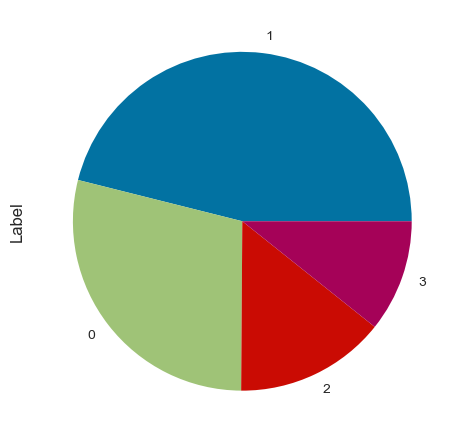

In [37]:
data['Label'].value_counts().plot(kind='pie')
plt.show()

In [38]:
data.groupby(by='Label').median().T

Label,0,1,2,3
Global_active_power,3.914,1.806,3.888,6.135
Global_reactive_power,0.286,0.226,0.204,0.248
Voltage,236.450,239.010,236.770,233.640
Global_intensity,16.600,7.600,16.400,26.200
Kitchen_consumption,37.000,1.000,1.000,36.000
Laundry_consumption,1.000,1.000,31.000,35.000
Other_appliances_consumption,17.000,18.000,17.000,17.000


In [39]:
data['Overall_avg_consumption'] = np.mean(data[['Kitchen_consumption',\
                                                'Laundry_consumption','Other_appliances_consumption']], axis=1)

On the basis of the overall consumption
* Label 3 --> Very High
* Label 0 --> High
* Label 2 --> Medium
* Label 1 --> Low

In [40]:
category = {3:'Very High', 0:'High', 2:'Medium',1:'Low'}

In [41]:
data['Category'] = data['Label'].map(category)

In [42]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Label,Overall_avg_consumption,Category
0,2.242,0.162,237.33,10.0,1,7,17,1,8.333333,Low
1,3.714,0.296,235.15,15.8,2,35,17,2,18.000000,Medium
2,3.212,0.304,235.99,14.2,1,26,17,2,14.666667,Medium
3,3.694,0.280,235.16,15.6,1,35,17,2,17.666667,Medium
4,3.204,0.292,236.08,14.0,1,27,17,2,15.000000,Medium


In [43]:
data.rename(columns = {'Label':'Consumption_Category'}, inplace=True)

In [44]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Consumption_Category,Overall_avg_consumption,Category
0,2.242,0.162,237.33,10.0,1,7,17,1,8.333333,Low
1,3.714,0.296,235.15,15.8,2,35,17,2,18.000000,Medium
2,3.212,0.304,235.99,14.2,1,26,17,2,14.666667,Medium
3,3.694,0.280,235.16,15.6,1,35,17,2,17.666667,Medium
4,3.204,0.292,236.08,14.0,1,27,17,2,15.000000,Medium


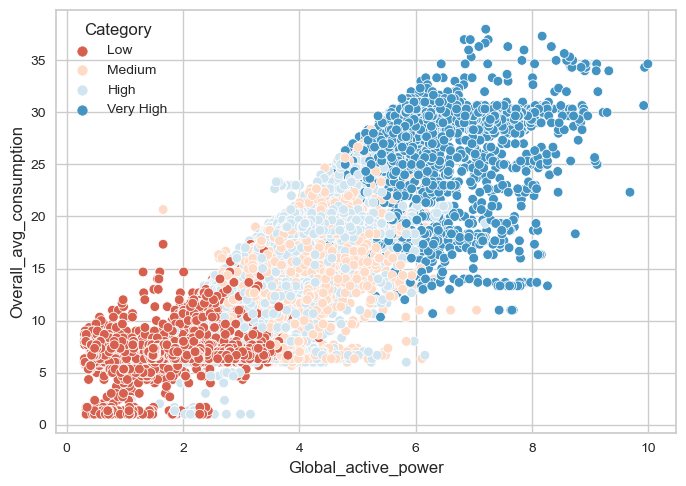

In [45]:
sns.scatterplot(x=data['Global_active_power'], y=data['Overall_avg_consumption'], hue = data['Category'], \
                palette= 'RdBu')
plt.show()